In [1]:
# Loading the Dataset
# Data Visualization
# Train Test Data split
# Model building
# Training
# Evaluation
# Streamlit application

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# checking if there's any null value in the dataset
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
# checking the shape
df.shape

(5572, 4)

In [6]:
# checking the number of unique values in 'label'
# value_counts -> Return a Series containing counts of unique values.
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
# the dataset isn't balanced. So, we need to sample 747 ham messages out of 4825.
# sample -> Return a random sample of items from an axis of object.
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)[source]
# n: int, optional. Number of items from axis to return.

ham = df[df['label']=='ham']
spam = df[df['label']=='spam']
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [15]:
# Concatenate the ham and the spam samples
# pandas.concat
# Concatenate pandas objects along a particular axis.

data = pd.concat([ham, spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

In [17]:
# Check the datahead now
data.head()

,label,message,length,punct
0,ham,Never blame a day in ur life. Good days give u...,152,7
1,ham,Cps is causing the outages to conserve energy.,46,1
2,ham,Congratulations ore mo owo re wa. Enjoy it and...,103,1
3,ham,V-aluable. A-ffectionate. L-oveable. E-ternal....,130,20
4,ham,Ummmmmaah Many many happy returns of d day my ...,84,2


#### Exploratory Data Analysis

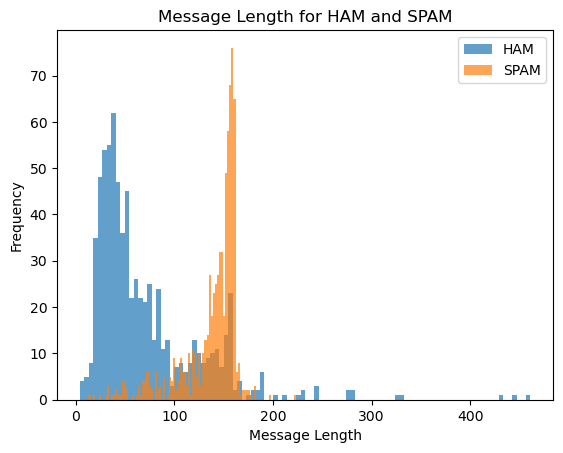

In [28]:
# Messages length of more than 180's are highly frequent in SPAM compared to HAM.

plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.xlabel('Message Length')
plt.ylabel('Frequency')     
plt.legend()
plt.show()

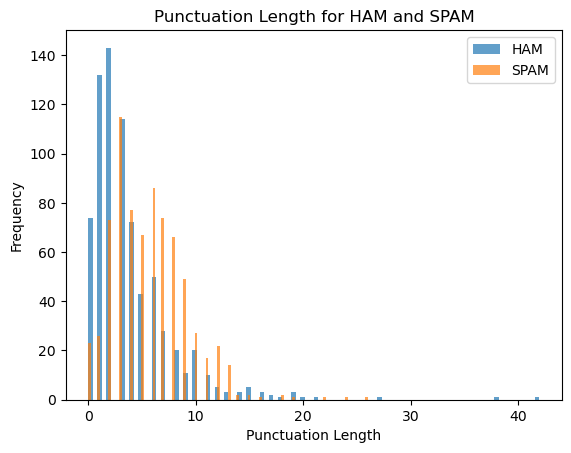

In [29]:
# Messages length of more than 180's are highly frequent in SPAM compared to HAM.

plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Punctuation Length for HAM and SPAM')
plt.xlabel('Punctuation Length')
plt.ylabel('Frequency')     
plt.legend()
plt.show()

#### Data Preparation for Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
# stratify=data['label'] means that the split between the training and testing data will maintain the same distribution of labels (e.g., if 30% of the samples in the original dataset belong to class 'A' and 70% to class 'B', this ratio will be preserved in both the X_train and X_test datasets).

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [34]:
# n_estimators=100 means that the model will create 100 decision trees in the forest.
# n_jobs=-1 allows the classifier to use all available CPU cores for parallel processing, speeding up the computation.
# clf.fit(X_train, y_train) trains the entire pipeline. It first applies the TfidfVectorizer to the X_train data to transform the text into TF-IDF features and then uses these features to train the RandomForestClassifier on y_train (the labels).

clf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       150
        spam       1.00      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299

